In [3]:
import gzip
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:

gz_file_path = 'QUOT_SIM2_latest-20240201-20240327.csv.gz'
# The path for the new CSV file you want to create
csv_file_path = '20240201-20240327.csv'

# Open the .gz file in text read mode ('rt')
with gzip.open(gz_file_path, 'rt') as gz_file:
    # Open the CSV file for writing
    with open(csv_file_path, 'w', newline='') as csv_file:
        # Create a CSV writer object
        writer = csv.writer(csv_file)

        # Assuming each line in the .gz file is a CSV row
        for line in gz_file:
            # Split the line into a list at the comma
            # This assumes a simple CSV structure without quoted commas
            # For more complex parsing, consider using csv.reader on the gz_file object
            row = line.strip().split(',')
            
            # Write the row to the CSV file
            writer.writerow(row)


In [25]:
csv_file_path = '2020-202402.csv'

with open(csv_file_path, newline='') as csv_file:
    reader = csv.reader(csv_file)
    
    # Fetch the header row
    header = next(reader)
    print('Headers:', header)
    
    # Print a few data rows for example
    print('Sample Data Rows:')
    for _ in range(5):  # Adjust number to print more or fewer rows
        try:
            print(next(reader))
        except StopIteration:
            break  # Stop if there are less than 5 rows of data


Headers: ['LAMBX;LAMBY;DATE;PRENEI_Q;PRELIQ_Q;T_Q;FF_Q;Q_Q;DLI_Q;SSI_Q;HU_Q;EVAP_Q;ETP_Q;PE_Q;SWI_Q;DRAINC_Q;RUNC_Q;RESR_NEIGE_Q;RESR_NEIGE6_Q;HTEURNEIGE_Q;HTEURNEIGE6_Q;HTEURNEIGEX_Q;SNOW_FRAC_Q;ECOULEMENT_Q;WG_RACINE_Q;WGI_RACINE_Q;TINF_H_Q;TSUP_H_Q']
Sample Data Rows:
['600;24010;20200101;0.0;0.4;9.9;2.1;7.414;3161.6;111.1;98.4;0.1;0.3;0.3;0.940;2.2;0.1;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.315;0.000;9.5;10.9']
['600;24010;20200102;0.0;0.6;11.3;5.5;7.396;2955.5;55.2;89.8;0.7;0.4;-0.1;0.933;2.0;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.314;0.000;9.5;11.9']
['600;24010;20200103;0.0;0.8;9.6;6.1;6.458;3066.2;56.5;87.2;1.0;0.7;-0.2;0.926;1.9;0.1;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.313;0.000;8.8;10.6']
['600;24010;20200104;0.0;0.0;8.1;2.7;5.230;2564.4;142.7;78.8;0.1;0.8;-0.1;0.919;1.8;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.312;0.000;5.4;10.2']
['600;24010;20200105;0.0;0.0;7.2;3.3;5.125;2774.9;115.8;81.9;0.3;1.1;-0.3;0.912;1.7;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.311;0.000;7.6;8.8']


In [4]:
csv_file_path = '2010-2019.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df1.head()


,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20100101,0.4,0.0,4.3,5.0,4.042,2718.0,310.1,...,0.0,0.001,0.000,0.000,0.0,0.1,0.322,0.0,3.3,5.7
1,600,24010,20100102,0.0,0.2,2.2,2.6,3.324,2347.9,489.5,...,0.3,0.000,0.002,0.003,0.0,0.3,0.320,0.0,-1.0,5.5
2,600,24010,20100103,0.0,0.0,3.9,5.9,3.485,2443.2,115.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.319,0.0,2.4,4.7
3,600,24010,20100104,0.0,0.0,1.6,4.6,2.976,2243.8,613.2,...,0.0,0.000,0.000,0.000,0.0,0.0,0.317,0.0,1.0,3.6
4,600,24010,20100105,0.0,4.4,1.9,3.7,3.595,2593.9,199.3,...,0.0,0.000,0.000,0.000,0.0,0.0,0.315,0.0,-0.2,3.4


In [5]:
csv_file_path = '2020-202402.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df2.head()

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20200101,0.0,0.4,9.9,2.1,7.414,3161.6,111.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.315,0.0,9.5,10.9
1,600,24010,20200102,0.0,0.6,11.3,5.5,7.396,2955.5,55.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.314,0.0,9.5,11.9
2,600,24010,20200103,0.0,0.8,9.6,6.1,6.458,3066.2,56.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.313,0.0,8.8,10.6
3,600,24010,20200104,0.0,0.0,8.1,2.7,5.230,2564.4,142.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.312,0.0,5.4,10.2
4,600,24010,20200105,0.0,0.0,7.2,3.3,5.125,2774.9,115.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.311,0.0,7.6,8.8


In [6]:
csv_file_path = '20240201-20240327.csv'

# Read the CSV file into a DataFrame
df3 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df3.head()

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20240201,0.0,1.0,10.8,3.4,7.850,3232.8,136.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307,0.0,9.7,11.8
1,600,24010,20240202,0.0,0.6,10.5,3.6,7.729,3171.3,135.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307,0.0,9.7,11.4
2,600,24010,20240203,0.0,0.8,10.5,3.1,7.466,3079.2,234.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306,0.0,9.8,11.1
3,600,24010,20240204,0.0,0.5,10.4,4.0,6.754,3051.1,158.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306,0.0,10.2,11.1
4,600,24010,20240205,0.0,0.4,10.6,4.4,6.989,3050.7,161.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.305,0.0,9.4,11.9


In [7]:

df = pd.concat([df1, df2, df3], axis=0)

# Réinitialiser l'index pour éviter les index dupliqués
df.reset_index(drop=True, inplace=True)
df

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20100101,0.4,0.0,4.3,5.0,4.042,2718.0,310.1,...,0.0,0.001,0.000,0.000,0.0,0.1,0.322,0.0,3.3,5.7
1,600,24010,20100102,0.0,0.2,2.2,2.6,3.324,2347.9,489.5,...,0.3,0.000,0.002,0.003,0.0,0.3,0.320,0.0,-1.0,5.5
2,600,24010,20100103,0.0,0.0,3.9,5.9,3.485,2443.2,115.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.319,0.0,2.4,4.7
3,600,24010,20100104,0.0,0.0,1.6,4.6,2.976,2243.8,613.2,...,0.0,0.000,0.000,0.000,0.0,0.0,0.317,0.0,1.0,3.6
4,600,24010,20100105,0.0,4.4,1.9,3.7,3.595,2593.9,199.3,...,0.0,0.000,0.000,0.000,0.0,0.0,0.315,0.0,-0.2,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51725263,11960,17450,20240323,0.0,0.2,13.1,2.0,6.968,2747.3,2148.8,...,0.0,0.000,0.000,0.000,0.0,0.0,0.262,0.0,10.2,17.8
51725264,11960,17450,20240324,0.0,0.0,13.2,2.5,5.998,2553.1,1485.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.261,0.0,11.1,17.1
51725265,11960,17450,20240325,0.0,2.3,11.3,3.1,5.716,2643.1,1639.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.260,0.0,5.5,17.7
51725266,11960,17450,20240326,0.0,7.8,12.3,2.6,8.029,3186.3,423.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.259,0.0,9.4,13.3


#### Check for Missing Values

In [8]:

# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)


LAMBX            0
LAMBY            0
DATE             0
PRENEI_Q         0
PRELIQ_Q         0
T_Q              0
FF_Q             0
Q_Q              0
DLI_Q            0
SSI_Q            0
HU_Q             0
EVAP_Q           0
ETP_Q            0
PE_Q             0
SWI_Q            0
DRAINC_Q         0
RUNC_Q           0
RESR_NEIGE_Q     0
RESR_NEIGE6_Q    0
HTEURNEIGE_Q     0
HTEURNEIGE6_Q    0
HTEURNEIGEX_Q    0
SNOW_FRAC_Q      0
ECOULEMENT_Q     0
WG_RACINE_Q      0
WGI_RACINE_Q     0
TINF_H_Q         0
TSUP_H_Q         0
dtype: int64


In [9]:
# Sélectionnez seulement les colonnes nécessaires
df = df[["LAMBX", "LAMBY", "DATE", "PRENEI_Q", "PRELIQ_Q", "T_Q", "TINF_H_Q", "TSUP_H_Q"]]

In [10]:
df.dtypes

LAMBX         int64
LAMBY         int64
DATE          int64
PRENEI_Q    float64
PRELIQ_Q    float64
T_Q         float64
TINF_H_Q    float64
TSUP_H_Q    float64
dtype: object

In [16]:
# # Convertir les colonnes en types de données qui utilisent moins de mémoire
# df.loc[:,'LAMBX'] = df['LAMBX'].astype('int32')
# df.loc[:,'LAMBY'] = df['LAMBY'].astype('int32')
# df.loc[:,'PRENEI_Q'] = df['PRENEI_Q'].astype('float32')
# df.loc[:,'PRELIQ_Q'] = df['PRELIQ_Q'].astype('float32')
# df.loc[:, 'T_Q'] = df['T_Q'].astype('float32')
# df.loc[:, 'TINF_H_Q'] = df['TINF_H_Q'].astype('float32')
# df.loc[:, 'TSUP_H_Q'] = df['TSUP_H_Q'].astype('float32')

df['LAMBX'] = df['LAMBX'].astype('int32')
df['LAMBY'] = df['LAMBY'].astype('int32')
df['PRENEI_Q'] = df['PRENEI_Q'].astype('float32')
df['PRELIQ_Q'] = df['PRELIQ_Q'].astype('float32')
df['T_Q'] = df['T_Q'].astype('float32')
df['TINF_H_Q'] = df['TINF_H_Q'].astype('float32')
df['TSUP_H_Q'] = df['TSUP_H_Q'].astype('float32')


C:\Users\w130156\AppData\Local\Temp\ipykernel_304\2898851072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAMBX'] = df['LAMBX'].astype('int32')
C:\Users\w130156\AppData\Local\Temp\ipykernel_304\2898851072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAMBY'] = df['LAMBY'].astype('int32')
C:\Users\w130156\AppData\Local\Temp\ipykernel_304\2898851072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
df.dtypes

LAMBX                int32
LAMBY                int32
DATE        datetime64[ns]
PRENEI_Q           float32
PRELIQ_Q           float32
T_Q                float32
TINF_H_Q           float32
TSUP_H_Q           float32
dtype: object

In [35]:
# Ensure the DATE column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Function to filter data for the same day and month across all years
def filter_by_date(df, month, day):
    return df[(df['DATE'].dt.month == month) & (df['DATE'].dt.day == day)]

df.loc[:, 'Month'] = df['DATE'].dt.month
df.loc[:, 'Day'] = df['DATE'].dt.day
df

C:\Users\w130156\AppData\Local\Temp\ipykernel_304\1441059409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')


,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,TINF_H_Q,TSUP_H_Q,Month,Day
0,600,24010,2010-01-01,0.4,0.0,4.3,3.3,5.700000,1,1
1,600,24010,2010-01-02,0.0,0.2,2.2,-1.0,5.500000,1,2
2,600,24010,2010-01-03,0.0,0.0,3.9,2.4,4.700000,1,3
3,600,24010,2010-01-04,0.0,0.0,1.6,1.0,3.600000,1,4
4,600,24010,2010-01-05,0.0,4.4,1.9,-0.2,3.400000,1,5
...,...,...,...,...,...,...,...,...,...,...
51725263,11960,17450,2024-03-23,0.0,0.2,13.1,10.2,17.799999,3,23
51725264,11960,17450,2024-03-24,0.0,0.0,13.2,11.1,17.100000,3,24
51725265,11960,17450,2024-03-25,0.0,2.3,11.3,5.5,17.700001,3,25
51725266,11960,17450,2024-03-26,0.0,7.8,12.3,9.4,13.300000,3,26


In [38]:
# Filter the DataFrame for August 2017
filtered_df = df[(df['DATE'].dt.year == 2017) & (df['DATE'].dt.month == 8)]

# Get the unique temperatures for August 2017
unique_temperatures = filtered_df['T_Q'].unique()

# Print the unique temperatures
print(unique_temperatures)


[16.6 17.5 17.9 17.1 15.4 15.  15.2 15.1 15.7 15.8 16.7 15.6 16.1 16.5
 17.3 19.1 16.4 18.2 21.6 17.4 16.  17.8 18.6 19.4 14.2 14.8 17.7 18.
 14.6 14.7 15.5 19.2 14.9 19.6 20.4 16.2 20.8 22.2 13.9 14.4 18.1 15.9
 15.3 16.9 19.3 19.8 20.5 16.3 21.  22.4 14.  17.  19.  17.2 18.8 21.2
 18.3 16.8 21.5 18.5 14.1 19.9 20.6 21.1 22.5 14.5 18.9 20.1 17.6 22.
 13.7 19.7 20.9 22.3 18.4 20.  13.4 13.8 18.7 21.9 14.3 19.5 20.3 20.7
 22.1 13.5 21.4 13.3 20.2 22.9 13.2 13.1 21.8 21.3 24.  24.2 21.7 23.7
 13.6 22.8 23.1 22.6 13.  23.9 23.5 23.8 12.9 24.1 23.4 22.7 12.7 12.5
 12.3 12.8 12.6 12.  23.2 23.6 12.1 12.4 23.3 25.  23.  24.5 24.6 24.3
 12.2 24.9 24.4 11.9 25.2 24.7 25.1 24.8 26.6 26.7 25.7 25.3 26.8 25.6
 10.3 11.  11.4 25.5 25.9 26.5 11.2  9.6 10.2 10.6 11.8 27.1 27.2 27.3
 25.4 27.4 11.1  9.4 10.  10.4 10.9 11.6 26.  27.  10.7  9.1 11.5 25.8
 26.2 10.8  9.7 26.1  8.5  9.   9.3  7.9  8.4  8.6 26.9  8.8  7.2  7.7
  7.8 10.1 27.7 27.6 27.8  7.   7.4  7.5  6.8  4.4  4.5  4.8 10.5  6.3
  5.4  3

In [37]:
from sklearn.ensemble import IsolationForest

# Function to apply Isolation Forest on a grouped subset of the data
def apply_isolation_forest(group):
    # Assuming 'T_Q' is the column to check for anomalies
    if len(group) > 1:  # Ensuring there are enough data points for the model
        model = IsolationForest(n_estimators=100, contamination=0.00001, random_state=42)
        X = group[['T_Q']]  # Feature matrix
        group['Anomaly_IsolationForest'] = model.fit_predict(X)
    else:
        group['Anomaly_IsolationForest'] = 1  # Mark as normal if only one data point
    return group

# Group the data by month and day, then apply the Isolation Forest
grouped = df.groupby(['Month', 'Day'])
results = grouped.apply(apply_isolation_forest)

# Filter to see the anomalies
anomalies = results[results['Anomaly_IsolationForest'] == -1]

print(anomalies[['LAMBX', 'LAMBY', 'DATE', 'T_Q', 'Anomaly_IsolationForest']])


                    LAMBX  LAMBY       DATE        T_Q  \
Month Day                                                
1     5   26963935  10280  21210 2017-01-05 -19.600000   
      13  26963943  10280  21210 2017-01-13 -19.100000   
      14  26963944  10280  21210 2017-01-14 -20.500000   
      15  26963945  10280  21210 2017-01-15 -21.400000   
      16  12511734  10280  21210 2013-01-16 -22.600000   
          26963946  10280  21210 2017-01-16 -22.600000   
3     31  1670176   10280  21210 2010-03-31 -14.200000   
          1670357   10280  21290 2010-03-31 -13.600000   
4     18  26964038  10280  21210 2017-04-18 -14.400000   
      19  26964039  10280  21210 2017-04-19 -16.400000   
      28  26964048  10280  21210 2017-04-28 -14.200000   
5     1   26964051  10280  21210 2017-05-01 -11.800000   
      3   26964053  10280  21210 2017-05-03  -8.700000   
          41416265  10280  21210 2021-05-03  -8.700000   
6     6   26964087  10280  21210 2017-06-06  -4.900000   
      7   2696

In [19]:

# Groupement par mois et jour, puis calcul de la moyenne de la température pour chaque groupe
avg_temp_per_day = df.groupby(['Month', 'Day'])['T_Q'].mean().reset_index()


C:\Users\w130156\AppData\Local\Temp\ipykernel_304\3883062136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['DATE'].dt.month
C:\Users\w130156\AppData\Local\Temp\ipykernel_304\3883062136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Day'] = df['DATE'].dt.day


In [27]:
# Assurez-vous que DATE est au format datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Calculez la moyenne quotidienne de la température pour la France
avg_daily_temp_france = df.groupby(['DATE'])['T_Q'].mean().reset_index()

# Renommez la colonne de moyenne pour clarifier
avg_daily_temp_france.rename(columns={'T_Q': 'T_Q_Moyenne'}, inplace=True)
avg_daily_temp_france

C:\Users\w130156\AppData\Local\Temp\ipykernel_304\3235783465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')


,DATE,T_Q_Moyenne
0,2010-01-01,1.796088
1,2010-01-02,-1.219571
2,2010-01-03,-0.834816
3,2010-01-04,-1.809765
4,2010-01-05,-2.438769
...,...,...
5195,2024-03-23,7.739952
5196,2024-03-24,6.134452
5197,2024-03-25,7.071613
5198,2024-03-26,7.653346


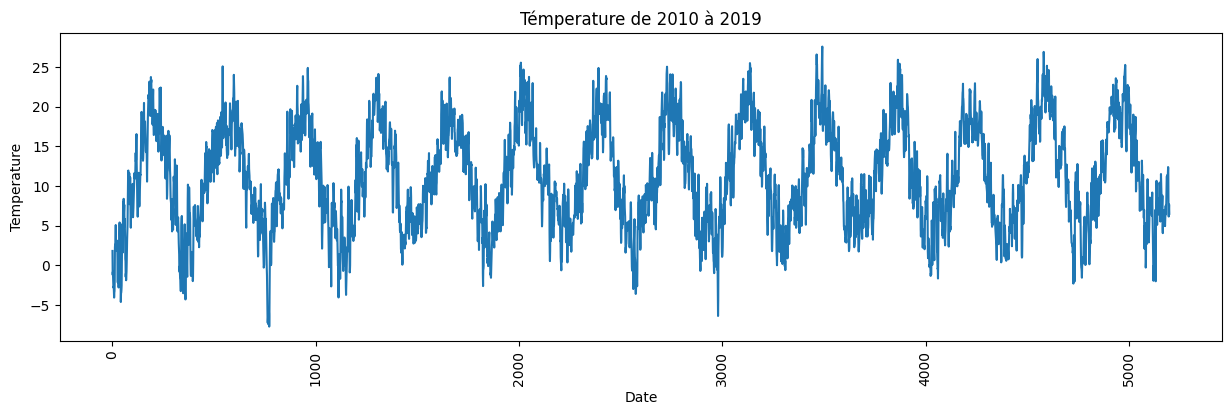

In [28]:
plt.figure(figsize=(15,4))
plt.plot(avg_daily_temp_france['T_Q_Moyenne'])
plt.gca().set(title='Témperature de 2010 à 2019', xlabel='Date', ylabel='Temperature')
plt.xticks(rotation=90)
plt.show()

In [29]:
additive_decomposition = seasonal_decompose(avg_daily_temp_france['T_Q_Moyenne'], model='additive', period=365)

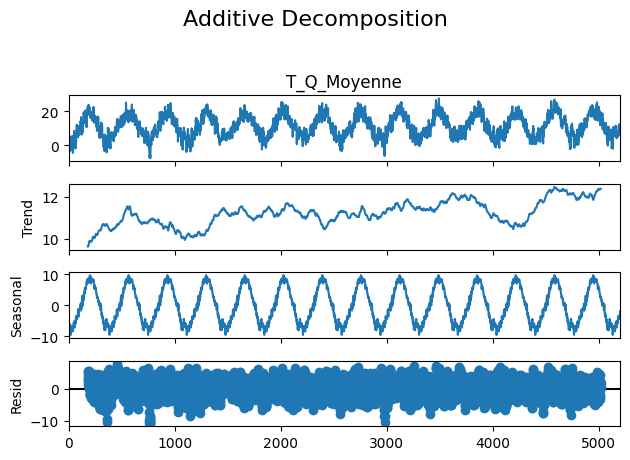

In [30]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
train_df = avg_daily_temp_france.iloc[0:4200]
X_train = train_df['T_Q_Moyenne']

test_df = avg_daily_temp_france.iloc[4200:5200]
X_test = test_df['T_Q_Moyenne']

Plotting AR model


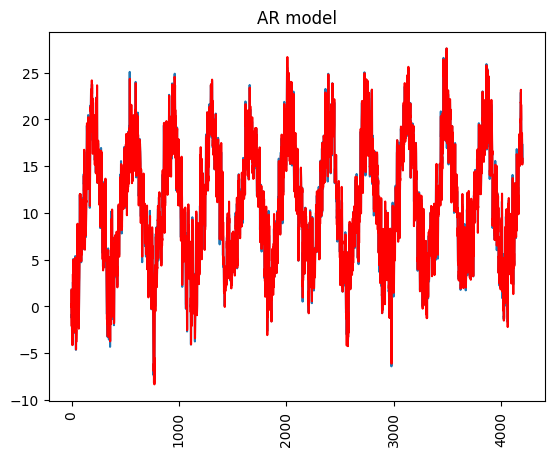

In [32]:
#AR MODEL
model_AR = ARIMA(X_train, order=(2, 1, 0)) 
results_AR = model_AR.fit()  
plt.plot(train_df['T_Q_Moyenne'])
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(rotation=90)
plt.title('AR model')
print('Plotting AR model')

In [33]:
rmse = sqrt(mean_squared_error(train_df['T_Q_Moyenne'], results_AR.fittedvalues))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.447
